In [9]:
import pandas as pd

df_1 = pd.read_csv('../Data/processed/RF/latest.csv')
df_2 = pd.read_csv('../Data/other_data/defacement.csv')

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   url                        450176 non-null  object 
 1   label                      450176 non-null  object 
 2   num_dots                   450176 non-null  int64  
 3   num_hyphens                450176 non-null  int64  
 4   num_slashes                450176 non-null  int64  
 5   num_digits                 450176 non-null  int64  
 6   num_equals                 450176 non-null  int64  
 7   ip_in_url                  450176 non-null  int64  
 8   has_highly_susp_keyword    450176 non-null  int64  
 9   hostname_length            450176 non-null  int64  
 10  has_additional_susp_words  450176 non-null  int64  
 11  has_susp_word_in_path      450176 non-null  int64  
 12  has_susp_word_in_hostname  450176 non-null  int64  
 13  has_suspicious_tld         45

In [20]:
df_2 = df_2.drop('tld',axis=1)

In [26]:
df_2.rename(columns={'type': 'label'}, inplace=True)

In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96457 entries, 0 to 96456
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        96457 non-null  object 
 1   label                      96457 non-null  object 
 2   num_dots                   96457 non-null  int64  
 3   num_hyphens                96457 non-null  int64  
 4   num_slashes                96457 non-null  int64  
 5   num_digits                 96457 non-null  int64  
 6   num_equals                 96457 non-null  int64  
 7   ip_in_url                  96457 non-null  int64  
 8   has_highly_susp_keyword    96457 non-null  int64  
 9   hostname_length            96457 non-null  int64  
 10  has_additional_susp_words  96457 non-null  int64  
 11  has_susp_word_in_path      96457 non-null  int64  
 12  has_susp_word_in_hostname  96457 non-null  int64  
 13  has_suspicious_tld         96457 non-null  int

In [31]:
cols_df1 = set(df_1.columns)
cols_df2 = set(df_2.columns)

only_in_df1 = cols_df1 - cols_df2
only_in_df2 = cols_df2 - cols_df1

print("Columns only in df1:", only_in_df1)
print("Columns only in df2:", only_in_df2)


Columns only in df1: set()
Columns only in df2: set()


In [30]:
df_2['hostname_uncommonness'] = 0

In [32]:
df_2 = df_2[df_1.columns]

merged_df = pd.concat([df_1, df_2], ignore_index=True)

merged_df.drop_duplicates(subset='url', inplace=True)


In [36]:
merged_df = merged_df.drop('hostname_uncommonness', axis=1)
merged_df = merged_df.drop('longest_dir_uncommonness', axis=1)

In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545484 entries, 0 to 546632
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   url                        545484 non-null  object 
 1   label                      545484 non-null  object 
 2   num_dots                   545484 non-null  int64  
 3   num_hyphens                545484 non-null  int64  
 4   num_slashes                545484 non-null  int64  
 5   num_digits                 545484 non-null  int64  
 6   num_equals                 545484 non-null  int64  
 7   ip_in_url                  545484 non-null  int64  
 8   has_highly_susp_keyword    545484 non-null  int64  
 9   hostname_length            545484 non-null  int64  
 10  has_additional_susp_words  545484 non-null  int64  
 11  has_susp_word_in_path      545484 non-null  int64  
 12  has_susp_word_in_hostname  545484 non-null  int64  
 13  has_suspicious_tld         545484 

In [35]:
before = len(df_1) + len(df_2)
after = len(merged_df)
print(f"Removed {before - after} duplicate URLs.")


Removed 1149 duplicate URLs.


In [ ]:
df_2.rename(columns={'type': 'label'}, inplace=True)

In [41]:
merged_df['label'] = merged_df['label'].replace('defacement', 'malicious')

In [45]:
merged_df['result'] = merged_df['result'].replace(2.0 , 1.0)

In [46]:
merged_df

,url,label,num_dots,num_hyphens,num_slashes,num_digits,num_equals,ip_in_url,has_highly_susp_keyword,hostname_length,...,consonant_pair_ratio,punctuation_density,hex_encoding_count,num_subdirs,AtSymbol,NumUnderscore,HasQueryString,path_length,max_dir_length,result
0,https://www.google.com,benign,2,0,2,0,0,0,0,14,...,0.125000,0.227273,0,0,0,0,0,0,0,0.0
1,https://www.youtube.com,benign,2,0,2,0,0,0,0,15,...,0.000000,0.217391,0,0,0,0,0,0,0,0.0
2,https://www.facebook.com,benign,2,0,2,0,0,0,0,16,...,0.100000,0.208333,0,0,0,0,0,0,0,0.0
3,https://www.baidu.com,benign,2,0,2,0,0,0,0,13,...,0.000000,0.238095,0,0,0,0,0,0,0,0.0
4,https://www.wikipedia.org,benign,2,0,2,0,0,0,0,17,...,0.090909,0.200000,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546628,http://blueanchor.nl/dintelmarkt/page/show_cat...,malicious,2,0,7,1,0,0,0,13,...,0.454545,0.171875,0,5,0,1,0,44,13,1.0
546629,http://www.hafenrocker.de/index.php,malicious,3,0,3,0,0,0,1,18,...,0.250000,0.200000,0,1,0,0,0,10,9,1.0
546630,http://www.kulgupuit.ee/index.php?option=com_p...,malicious,3,1,3,5,7,0,1,16,...,0.100000,0.195312,0,1,0,1,0,10,9,1.0
546631,http://www.nhomkinhdep.com/tu-bep-nhom-kinh.html,malicious,3,3,3,0,0,0,0,19,...,0.384615,0.208333,0,1,0,0,0,22,21,1.0


In [ ]:
TARGET_COL = 'result'

feature_cols = [
    'num_dots',
    'num_hyphens', 
    'num_slashes',
    'num_digits',
    'num_equals',
    'ip_in_url',
    'has_highly_susp_keyword',
    'hostname_length',
    'has_additional_susp_words',
    'has_susp_word_in_path',
    'has_susp_word_in_hostname',
    'has_suspicious_tld',
    'has_uncommon_tld',
    'url_entropy',
    'subdomain_count',
    'no_www',
    'tld_length',
    'short_url',
    'consonant_pair_ratio',
    'punctuation_density',
    'hex_encoding_count',
    'num_subdirs',
    'AtSymbol',
    'NumUnderscore',
    'HasQueryString',
    # 'filename_length',

    'path_length',
    
    'max_dir_length',

    'hostname_uncommonness',
    'longest_dir_uncommonness'
]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = merged_df[feature_cols]
y = merged_df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


--- Random Forest Results ---
Accuracy: 0.9881
Precision (for class 1 - Malicious): 0.9918
Recall (for class 1 - Malicious): 0.9757
F1-Score (for class 1 - Malicious): 0.9837

Classification Report (Random Forest):
               precision    recall  f1-score   support

   Benign (0)       0.99      1.00      0.99     69148
Malicious (1)       0.99      0.98      0.98     39949

     accuracy                           0.99    109097
    macro avg       0.99      0.99      0.99    109097
 weighted avg       0.99      0.99      0.99    109097

Confusion Matrix (Random Forest):
[[68824   324]
 [  970 38979]]


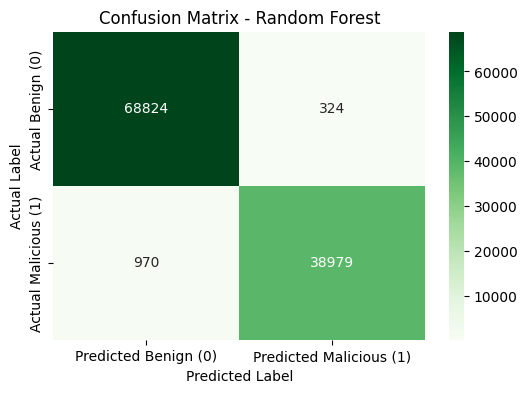


AUC-ROC Score (Random Forest): 0.9984


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_rf = model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1, zero_division=0)

print(f"\n--- Random Forest Results ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision (for class 1 - Malicious): {precision_rf:.4f}")
print(f"Recall (for class 1 - Malicious): {recall_rf:.4f}")
print(f"F1-Score (for class 1 - Malicious): {f1_rf:.4f}")

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Benign (0)', 'Malicious (1)'], zero_division=0))

print("Confusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', # Changed cmap for distinction
            xticklabels=['Predicted Benign (0)', 'Predicted Malicious (1)'],
            yticklabels=['Actual Benign (0)', 'Actual Malicious (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

y_pred_proba_rf = model.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nAUC-ROC Score (Random Forest): {auc_roc_rf:.4f}")

In [53]:
merged_df

,url,label,num_dots,num_hyphens,num_slashes,num_digits,num_equals,ip_in_url,has_highly_susp_keyword,hostname_length,...,consonant_pair_ratio,punctuation_density,hex_encoding_count,num_subdirs,AtSymbol,NumUnderscore,HasQueryString,path_length,max_dir_length,result
0,https://www.google.com,benign,2,0,2,0,0,0,0,14,...,0.125000,0.227273,0,0,0,0,0,0,0,0.0
1,https://www.youtube.com,benign,2,0,2,0,0,0,0,15,...,0.000000,0.217391,0,0,0,0,0,0,0,0.0
2,https://www.facebook.com,benign,2,0,2,0,0,0,0,16,...,0.100000,0.208333,0,0,0,0,0,0,0,0.0
3,https://www.baidu.com,benign,2,0,2,0,0,0,0,13,...,0.000000,0.238095,0,0,0,0,0,0,0,0.0
4,https://www.wikipedia.org,benign,2,0,2,0,0,0,0,17,...,0.090909,0.200000,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546628,http://blueanchor.nl/dintelmarkt/page/show_cat...,malicious,2,0,7,1,0,0,0,13,...,0.454545,0.171875,0,5,0,1,0,44,13,1.0
546629,http://www.hafenrocker.de/index.php,malicious,3,0,3,0,0,0,1,18,...,0.250000,0.200000,0,1,0,0,0,10,9,1.0
546630,http://www.kulgupuit.ee/index.php?option=com_p...,malicious,3,1,3,5,7,0,1,16,...,0.100000,0.195312,0,1,0,1,0,10,9,1.0
546631,http://www.nhomkinhdep.com/tu-bep-nhom-kinh.html,malicious,3,3,3,0,0,0,0,19,...,0.384615,0.208333,0,1,0,0,0,22,21,1.0


In [52]:
merged_df = merged_df.drop('hostname2',axis=1)
merged_df = merged_df.drop('path',axis=1)
merged_df = merged_df.drop('longest_dir',axis=1)
merged_df = merged_df.drop('max_dir_len',axis=1)

In [ ]:
train_urls = merged_df.loc[X_train.index]['url']

benign_train_urls = train_urls[y_train == 0]

from collections import defaultdict

ngram_freqs = defaultdict(int)
total_ngrams = 0

print("Building N-gram frequency model from benign training data...")
for url in benign_train_urls:
    try:
        hostname = urlparse(url).hostname
        if hostname:
            domain_parts = hostname.split('.')
            if len(domain_parts) > 2 and domain_parts[0] == 'www':
                core_domain = domain_parts[1]
            elif len(domain_parts) > 1:
                core_domain = domain_parts[0]
            else:
                core_domain = hostname
            
            for i in range(len(core_domain) - 1):
                ngram = core_domain[i:i+2]
                ngram_freqs[ngram] += 1
                total_ngrams += 1
            for i in range(len(core_domain) - 2):
                ngram = core_domain[i:i+3]
                ngram_freqs[ngram] += 1
                total_ngrams += 1
    except:
        continue

for ngram in ngram_freqs:
    ngram_freqs[ngram] = ngram_freqs[ngram] / total_ngrams

print("N-gram model built successfully.")

import numpy as np


def calculate_uncommonness_score(text, ngram_model, total_ngrams):
    if not isinstance(text, str) or not text:
        return 0
        
    score = 0
    num_ngrams_in_text = 0
    
    for i in range(len(text) - 1):
        ngram = text[i:i+2]
        prob = ngram_model.get(ngram, 1.0 / (total_ngrams + 1))
        score += -np.log(prob)
        num_ngrams_in_text += 1
        
    # 3-grams
    for i in range(len(text) - 2):
        ngram = text[i:i+3]
        prob = ngram_model.get(ngram, 1.0 / (total_ngrams + 1))
        score += -np.log(prob)
        num_ngrams_in_text += 1
        
    if num_ngrams_in_text == 0:
        return 0
    return score / num_ngrams_in_text


from urllib.parse import urlparse
import pandas as pd


def robust_url_parser(url):
    default_return = ('', '', '', 0) 
    if not isinstance(url, str):
        return default_return
    try:
        parsed = urlparse(url)
        hostname = parsed.hostname if parsed.hostname else ''
        path = parsed.path if parsed.path else ''
        
        directories = [d for d in path.split('/') if d]
        if not directories:
            longest_dir, max_len = '', 0
        else:
            longest_dir = max(directories, key=len)
            max_len = len(longest_dir)
            
        return hostname, path, longest_dir, max_len
    except ValueError:
        return default_return
    
component_cols = ['hostname', 'path', 'longest_dir', 'max_dir_len']

if not all(col in merged_df.columns for col in component_cols):
    print("Parsing URL components safely...")
    parsed_components = merged_df['url'].apply(robust_url_parser)
    components_df = pd.DataFrame(parsed_components.tolist(), index=merged_df.index, columns=component_cols)
    merged_df = merged_df.join(components_df)
    print("URL components added.")
else:
    print("URL component columns already exist. Skipping parsing.")


ngram_feature_cols = ['hostname_uncommonness', 'longest_dir_uncommonness']

if not all(col in merged_df.columns for col in ngram_feature_cols):
    print("Creating N-gram features from safe columns...")
    merged_df['hostname_uncommonness'] = merged_df['hostname'].apply(
        lambda h: calculate_uncommonness_score(h, ngram_freqs, total_ngrams)
    )
    merged_df['longest_dir_uncommonness'] = merged_df['longest_dir'].apply(
        lambda d: calculate_uncommonness_score(d, ngram_freqs, total_ngrams)
    )
    print("N-gram features created.")
else:
    print("N-gram features already exist. Skipping creation.")

Building N-gram frequency model from benign training data...
N-gram model built successfully.
Parsing URL components safely...
URL components added.
Creating N-gram features from safe columns...
N-gram features created.


In [57]:
new_csv = "../Data/processed/final.csv"

try:
    merged_df.to_csv(new_csv, index=False)
    print(f"DataFrame successfully saved to '{new_csv}'")
except Exception as e:
    print(f"Error saving DataFrame to CSV: {e}")


DataFrame successfully saved to '../Data/processed/final.csv'


In [58]:
print(merged_df['label'].value_counts())

label
benign       345738
malicious    199746
Name: count, dtype: int64


In [1]:
import pandas as pd
df = pd.read_csv("../Data/processed/final.csv")

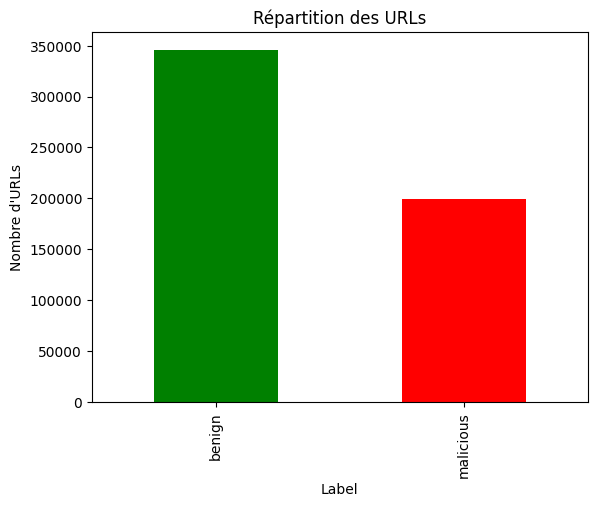

In [2]:
import matplotlib.pyplot as plt

counts = df['label'].value_counts()

counts.plot(kind='bar', color=['green', 'red'])
plt.title("Répartition des URLs")
plt.xlabel("Label")
plt.ylabel("Nombre d'URLs")
plt.show()

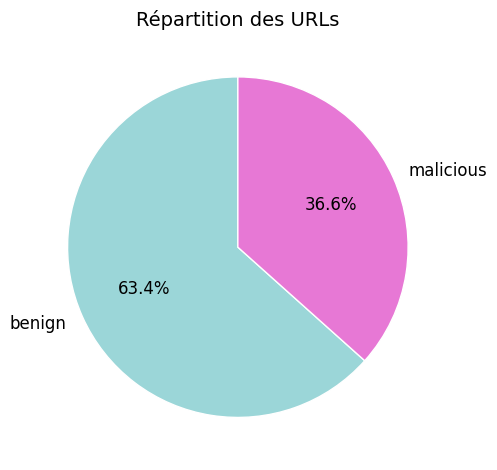

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df['label'].value_counts()

colors = ["#9bd6d8", "#e778d5"]   
counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white'},  
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.ylabel('')
plt.title("Répartition des URLs", fontsize=14)
plt.tight_layout()
plt.show()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545484 entries, 0 to 545483
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   url                        545484 non-null  object 
 1   label                      545484 non-null  object 
 2   num_dots                   545484 non-null  int64  
 3   num_hyphens                545484 non-null  int64  
 4   num_slashes                545484 non-null  int64  
 5   num_digits                 545484 non-null  int64  
 6   num_equals                 545484 non-null  int64  
 7   ip_in_url                  545484 non-null  int64  
 8   has_highly_susp_keyword    545484 non-null  int64  
 9   hostname_length            545484 non-null  int64  
 10  has_additional_susp_words  545484 non-null  int64  
 11  has_susp_word_in_path      545484 non-null  int64  
 12  has_susp_word_in_hostname  545484 non-null  int64  
 13  has_suspicious_tld         54

In [18]:
df = df.drop('max_dir_len', axis=1)

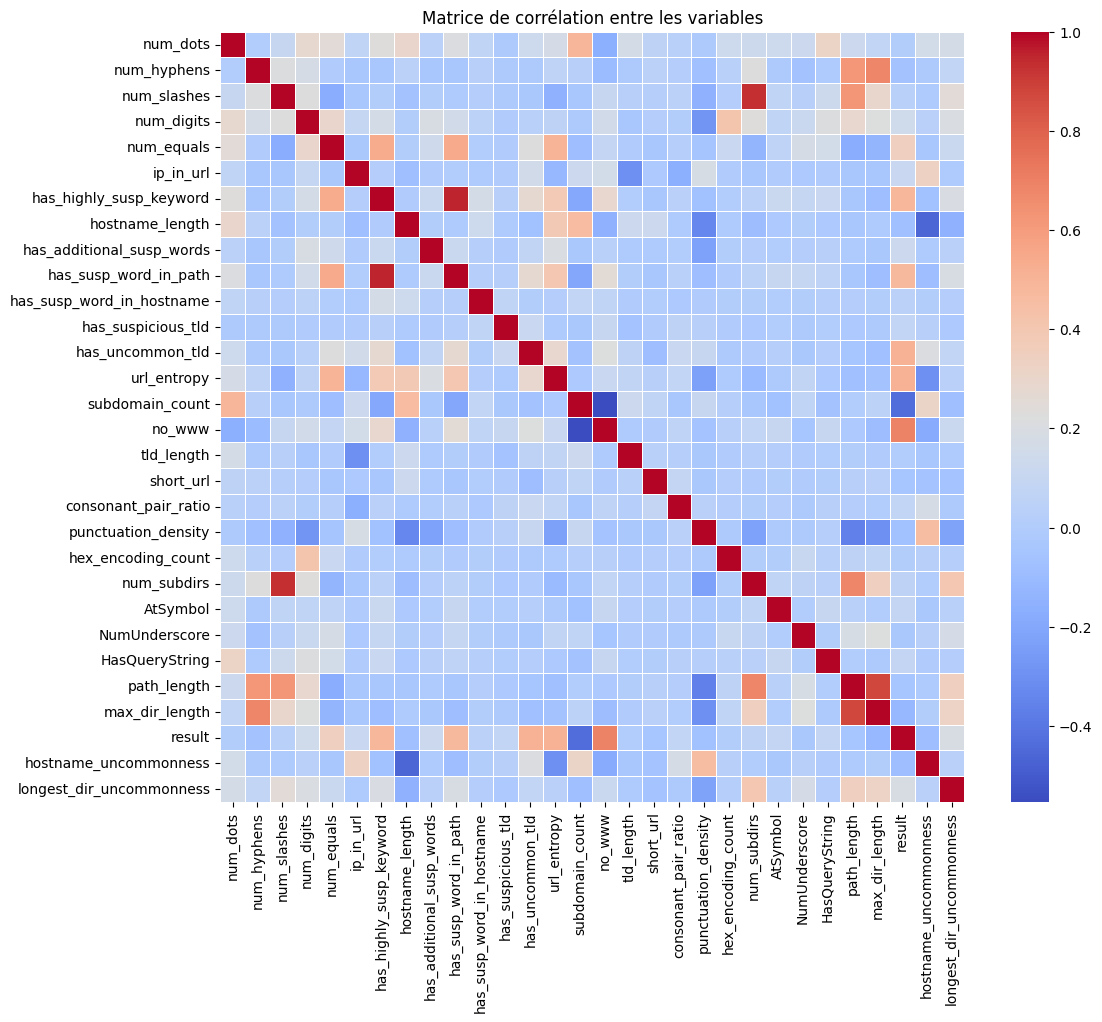

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation entre les variables")
plt.show()


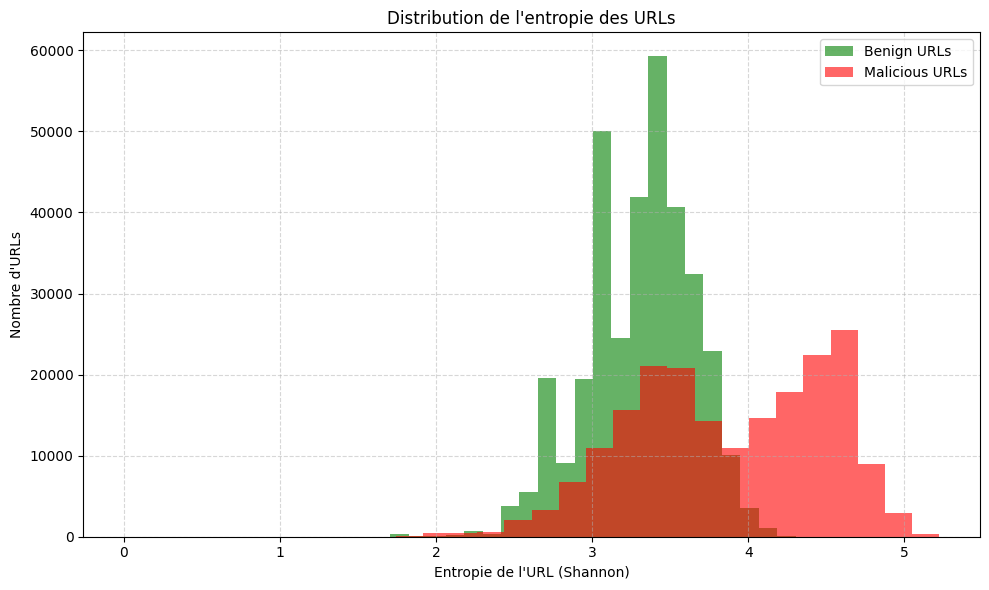

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Histogramme avec transparence, couleurs distinctes et bins fixes pour comparaison claire
plt.hist(df[df['result']==0]['url_entropy'], bins=30, alpha=0.6, color='green', label='Benign URLs')
plt.hist(df[df['result']==1]['url_entropy'], bins=30, alpha=0.6, color='red', label='Malicious URLs')

plt.title("Distribution de l'entropie des URLs")
plt.xlabel("Entropie de l'URL (Shannon)")
plt.ylabel("Nombre d'URLs")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
print(df[df['label'] == 0].shape[0])  # Benign
print(df[df['label'] == 1].shape[0])  # Malicious


0
0


In [114]:
df

,url,label,num_dots,num_hyphens,num_slashes,num_digits,num_equals,ip_in_url,has_highly_susp_keyword,hostname_length,...,NumUnderscore,HasQueryString,path_length,max_dir_length,result,hostname,path,longest_dir,hostname_uncommonness,longest_dir_uncommonness
0,https://www.google.com,benign,2,0,2,0,0,0,0,14,...,0,0,0,0,0.0,www.google.com,,,10.893405,0.000000
1,https://www.youtube.com,benign,2,0,2,0,0,0,0,15,...,0,0,0,0,0.0,www.youtube.com,,,10.010763,0.000000
2,https://www.facebook.com,benign,2,0,2,0,0,0,0,16,...,0,0,0,0,0.0,www.facebook.com,,,9.704747,0.000000
3,https://www.baidu.com,benign,2,0,2,0,0,0,0,13,...,0,0,0,0,0.0,www.baidu.com,,,11.462770,0.000000
4,https://www.wikipedia.org,benign,2,0,2,0,0,0,0,17,...,0,0,0,0,0.0,www.wikipedia.org,,,10.131380,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545479,http://blueanchor.nl/dintelmarkt/page/show_cat...,malicious,2,0,7,1,0,0,0,13,...,1,0,44,13,1.0,blueanchor.nl,/dintelmarkt/page/show_category/catid/8.html,show_category,9.117309,9.005001
545480,http://www.hafenrocker.de/index.php,malicious,3,0,3,0,0,0,1,18,...,0,0,10,9,1.0,www.hafenrocker.de,/index.php,index.php,10.160154,10.237097
545481,http://www.kulgupuit.ee/index.php?option=com_p...,malicious,3,1,3,5,7,0,1,16,...,1,0,10,9,1.0,www.kulgupuit.ee,/index.php,index.php,11.437126,10.237097
545482,http://www.nhomkinhdep.com/tu-bep-nhom-kinh.html,malicious,3,3,3,0,0,0,0,19,...,0,0,22,21,1.0,www.nhomkinhdep.com,/tu-bep-nhom-kinh.html,tu-bep-nhom-kinh.html,10.680512,10.475483


In [107]:
df.sample(5)[["url", "label", "num_dots", "num_subdirs", "url_entropy", "hostname_uncommonness", "hostname_length"]]

,url,label,num_dots,num_subdirs,url_entropy,hostname_uncommonness,hostname_length
312369,https://www.tvguide.com/celebrities/john-hurt/...,benign,2,3,3.459432,10.624713,15
434715,https://onedrive.live.com/redir?resid=3F1D53D3...,malicious,2,1,3.337175,9.703226,17
447355,http://hecklerinc.com/js/uss/delta.com/delta20...,malicious,3,5,3.324863,8.827595,14
437768,"http://www.bancobrasil.com.br/portalbb/page3,1...",malicious,4,2,3.350209,10.439405,22
113119,https://www.usysc.com/page.php?page_id=1,benign,3,1,2.725481,11.437472,13
